# Exploratory Data Analysis on Software Engineer Salaries Dataset using Python

In [ ]:
import  numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
file = "software_engineer_salaries.csv"
data = pd.read_csv(file)

In [ ]:
print(data.shape)
print(data.columns)
print(data.dtypes)

(870, 6)
Index(['Company', 'Company Score', 'Job Title', 'Location', 'Date', 'Salary'], dtype='object')
Company           object
Company Score    float64
Job Title         object
Location          object
Date              object
Salary            object
dtype: object


In [ ]:
data.head()

,Company,Company Score,Job Title,Location,Date,Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.)
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.)
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.)
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.)
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.)


In [ ]:
data.tail()

,Company,Company Score,Job Title,Location,Date,Salary
865,RXO,NaN,"Software Engineer, Machine Learning Compute","San Francisco, CA",6d,NaN
866,Infosys,NaN,Software Engineer - 3 (Apache NiFi),"Annapolis Junction, MD",18d,NaN
867,Medtronic,NaN,Senior Software Engineer,"Southfield, MI",19d,NaN
868,NaN,NaN,Junior Python Developer,"Charlotte, NC",2d,NaN
869,NaN,NaN,GUI Software Engineer II - Surgical Robotics,"Boston, MA",10d,NaN


In [ ]:
data.sample(5)

,Company,Company Score,Job Title,Location,Date,Salary
623,Roche,4.3,Software Engineer (Customer-Facing Applications),"Arlington, VA",10d,$65K - $101K (Glassdoor est.)
108,AnaVation,3.7,Software Developer,"Quantico, VA",3d,$68K - $136K (Employer est.)
146,Super Micro Computer,3.0,Software Engineer,"San Jose, CA",30d+,$73K - $116K (Glassdoor est.)
546,"HireIO, Inc.",3.6,Senior Software Engineer - Aviation Databases,"Olathe, KS",30d,$73K - $88K (Employer est.)
741,Intersoft Data Labs,3.5,"Software Development Engineer II, Sort Tech","Tempe, AZ",3d,$100K - $135K (Glassdoor est.)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        868 non-null    object 
 1   Company Score  789 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       857 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB


In [ ]:
print(data.describe())

       Company Score
count     789.000000
mean        3.895311
std         0.524952
min         1.000000
25%         3.600000
50%         3.900000
75%         4.200000
max         5.000000


In [ ]:
data.isnull().sum()

,0
Company,2
Company Score,81
Job Title,0
Location,13
Date,0
Salary,106


In [ ]:
dataNullDropped = data.dropna()
dataNullDropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 753 entries, 0 to 763
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        753 non-null    object 
 1   Company Score  753 non-null    float64
 2   Job Title      753 non-null    object 
 3   Location       753 non-null    object 
 4   Date           753 non-null    object 
 5   Salary         753 non-null    object 
dtypes: float64(1), object(5)
memory usage: 41.2+ KB


In [ ]:
#fill with 0
dataNullFilled = data.fillna(0)
dataNullFilled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        870 non-null    object 
 1   Company Score  870 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       870 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         870 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB


In [ ]:
#fill with mean is not possible for the whole dataset as there are categorial and nominal values
newData = data.copy()
newData["Company Score"].fillna(newData["Company Score"].mean(), inplace = True)
newData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        868 non-null    object 
 1   Company Score  870 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       857 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB


In [ ]:
data_ffill = data.fillna(method='ffill')
data_bfill = data.fillna(method='bfill')

<ipython-input-58-e32be4163d79>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_ffill = data.fillna(method='ffill')
<ipython-input-58-e32be4163d79>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_bfill = data.fillna(method='bfill')


In [ ]:
newData = data.copy()
newData.ffill(inplace=True)
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        870 non-null    object 
 1   Company Score  870 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       870 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         870 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB


In [ ]:
newData = data.copy()
newData.bfill(inplace=True)
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        868 non-null    object 
 1   Company Score  789 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       870 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB


In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
865,False
866,False
867,False
868,False


In [ ]:
data.duplicated().sum()
#use drop_duplicates if duplicate rows do exists

0

In [ ]:
print(data['Job Title'].value_counts())

Job Title
Software Engineer                                         156
Senior Software Engineer                                   41
Software Engineer II                                       19
Software Developer                                         15
Software Engineer III                                      10
                                                         ... 
Software Engineer - Front End (Dashboard) - Aurora, CO      1
Software Engineer | Front End Developer                     1
Senior React/Javascript Software Engineer                   1
Application Programmer Analyst/Developer I                  1
GUI Software Engineer II - Surgical Robotics                1
Name: count, Length: 542, dtype: int64


In [ ]:
company_scores = data.groupby('Company')['Company Score'].mean()
print(company_scores)

Company
10ZIG TECHNOLOGY, INC.         NaN
3 Reasons Consulting      3.900000
360care                   3.000000
3R Info                   3.850000
7-Eleven, Inc.            3.400000
                            ...   
eimagine                  3.500000
f5                        3.633333
iconectiv, LLC.           3.500000
kasmo cloud solutions     4.000000
thatgamecompany           3.600000
Name: Company Score, Length: 648, dtype: float64


In [ ]:
print(data['Job Title'].unique())
#len(unique()) -->  nunique()
print(data['Job Title'].nunique())

['Software Engineer' 'Software Support Engineer' 'C# Software Engineer'
 'Software Engineer, Fullstack, 1+ Years of Experience'
 'Backend Engineer II' 'Associate Software Engineer' 'Software Developers'
 'Software Engineer II (Backend, Health)' 'Sr. Software Engineer'
 'MTS Software Engineer' 'Software Engineer I'
 'Software Engineer, athenaCollector – RCM Rules' 'Java Engineer'
 'Entry Level to Senior Level Software Developers'
 'Software Engineer, C++' 'Frontend Software Engineer'
 'Software Development Engineer' 'Software Engineer - HA (Hybrid)'
 'Engineer - React/JavaScript' 'Software Engineer - Martech'
 'Software Engineers' 'Senior Software Engineer'
 'Software Engineer III, Payments' 'Backend Software Engineer'
 'Experienced Software Engineer' 'Security Software Engineer'
 'Software Engineer, Unreal Engine' 'Software Developer'
 'Software Dev Engineer - Computer Science' 'Jr. Software Engineer'
 'Software Engineer - Libraries' 'Software Engineer (All Levels)'
 'Software/Database

<Axes: >

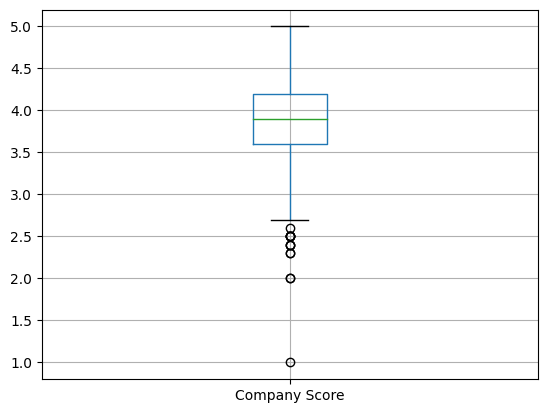

In [ ]:
data.boxplot(column = 'Company Score')